***TASK 2***

C:\Users\Competent\AppData\Local\Temp\ipykernel_13624\1822980946.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2023-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


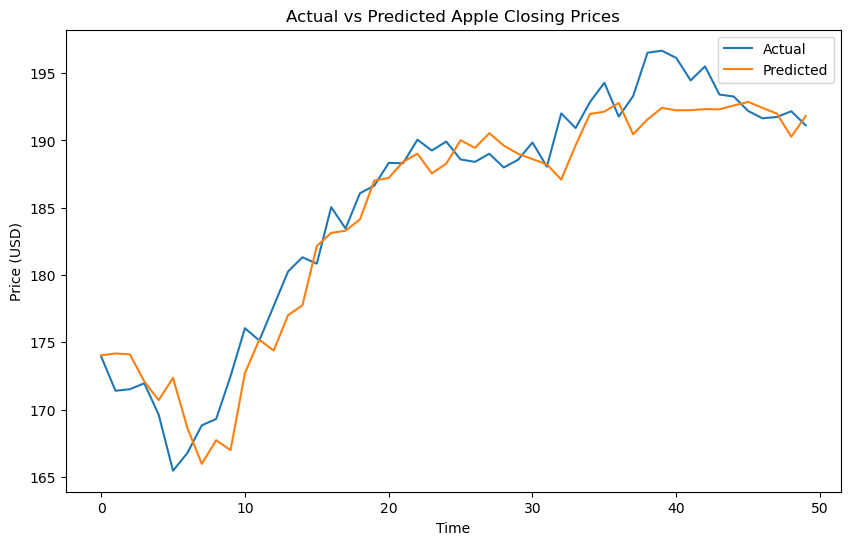

MSE: 5.992277230193662
RMSE: 2.4479128314124385


In [1]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Fetching Apple stock data
data = yf.download("AAPL", start="2023-01-01", end="2024-01-01")

# Preparing the dataset
data['Next_Close'] = data['Close'].shift(-1)
data.dropna(inplace=True)

# Defining features and target
features = ['Open', 'High', 'Low', 'Volume']
X = data[features]
y = data['Next_Close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False)

# Training the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Actual vs Predicted Apple Closing Prices")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)